In [1]:
!pip install textstat

  Using cached https://files.pythonhosted.org/packages/15/82/08a3629dce8d1f3d91db843bb36d4d7db6b6269d5067259613a0d5c8a9db/Pyphen-0.9.5-py2.py3-none-any.whl
  Running setup.py bdist_wheel for repoze.lru ... done
  Stored in directory: /home/jeanpierrethach/.cache/pip/wheels/80/c7/7e/74a37083827b36f0e87d60824124409b8cc88eea0940cada72
Successfully built repoze.lru


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import textstat
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from tqdm.auto import tqdm
from collections import Counter

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
BAD_WORD_LIST = './badwords.txt'

./badwords.txt
./ift6285-eda-test-split01.ipynb
./ift6285-eda-train_posts.ipynb
./preprocessed_test_split01.csv
./res.csv
./test_split01.csv
./test_split02.csv
./test_split03.csv
./test_split04.csv
./test_split05.csv
./test_split06.csv
./test_split07.csv
./test_split08.csv
./test_split09.csv
./test_split10.csv
./test_split11.csv
./train_posts.csv
./.ipynb_checkpoints/ift6285-eda-test-split01-checkpoint.ipynb
./.ipynb_checkpoints/ift6285-eda-train_posts-checkpoint.ipynb


In [2]:
train_df = pd.read_csv('train_posts.csv', names=['comment', 'label'])

## Tokenization

Tokenize the comments into words and sentences and add the following data elements:
* `word_count`: The number of words
* `sentence_count`: The number of sentences

In [3]:
RE_WORD = re.compile(r'^[a-zA-Z]+')
RE_URL = re.compile(r'\w+://\S+')
STOPWORDS = set(stopwords.words('english'))

def filter_no_stopwords(token):
    return token.lower() not in STOPWORDS

def filter_words_only(token):
    return RE_WORD.match(token)

def transform_drop_urls(text):
    return RE_URL.sub('', text)

def transform_lowercase(value):
    return value.lower()

def transform_stem(value):
    return STEMMER.stem(value)

class Tokenizer:
    DEFAULT_TEXT_TRANSFORMS = [transform_drop_urls]
    DEFAULT_TOKEN_FILTERS = [filter_words_only, filter_no_stopwords]
    DEFAULT_TOKEN_TRANSFORMS = [transform_lowercase]
    def __init__(self):
        self.text_transforms = self.DEFAULT_TEXT_TRANSFORMS
        self.token_filters = self.DEFAULT_TOKEN_FILTERS
        self.token_transforms = self.DEFAULT_TOKEN_TRANSFORMS
        
    def __call__(self, data):
        return (self.process_item(item) for item in show_progress(data, desc='Tokenization'))
    
    def transform(self, token):
        for transform in self.token_transforms:
            token = transform(token)
        return token
    
    def process_item(self, text):
        for text_transform in self.text_transforms:
            text = text_transform(text)
        tokens = word_tokenize(text)
        return [
            self.transform(token) for token in tokens
            if all(
                token_filter(token)
                for token_filter in self.token_filters)]

In [4]:
def enhance_tokenization(df):
    tokenizer = Tokenizer()
    df['length'] = df.comment.str.len()
    tqdm.pandas('Tokenizing Words')
    df['words'] = df.comment.progress_apply(word_tokenize)
    tqdm.pandas('Tokenizing Sentences')
    df['sentences'] = df.comment.progress_apply(sent_tokenize)
    tqdm.pandas('Tokenizing - Normalized')
    df['tokens'] = df.comment.progress_apply(tokenizer.process_item)
    df['word_count'] = df.words.apply(len)
    df['sentence_count'] = df.sentences.apply(len)

enhance_tokenization(train_df)
train_df

,comment,label,length,words,sentences,tokens,word_count,sentence_count
0,"long time.. i have been busy with work, school...",0,1112,"[long, time.., i, have, been, busy, with, work...","[long time.. i have been busy with work, schoo...","[long, time.., busy, work, school, rehersal, r...",256,13
1,what to talk about... well today was totaly bo...,0,571,"[what, to, talk, about, ..., well, today, was,...",[what to talk about... well today was totaly b...,"[talk, well, today, totaly, boring, im, tired,...",128,7
2,just some stuff which animal is your sex symbo...,0,1423,"[just, some, stuff, which, animal, is, your, s...",[just some stuff which animal is your sex symb...,"[stuff, animal, sex, symbol, urllink, antiprep...",282,23
3,i gots a job now... yesterday i started workin...,0,588,"[i, gots, a, job, now, ..., yesterday, i, star...",[i gots a job now... yesterday i started worki...,"[gots, job, yesterday, started, working, mi, m...",140,7
4,"movie night! i really do hate fridays, because...",0,696,"[movie, night, !, i, really, do, hate, fridays...","[movie night!, i really do hate fridays, becau...","[movie, night, really, hate, fridays, never, a...",156,12
...,...,...,...,...,...,...,...,...
512624,whenever i hear my band warm down i love it. t...,1,2779,"[whenever, i, hear, my, band, warm, down, i, l...","[whenever i hear my band warm down i love it.,...","[whenever, hear, band, warm, love, best, pract...",582,11
512625,well since the last entry me and my girl talke...,1,1806,"[well, since, the, last, entry, me, and, my, g...",[well since the last entry me and my girl talk...,"[well, since, last, entry, girl, talked, thing...",409,25
512626,*sigh* well tonight me and my girl decided to ...,1,9992,"[*sigh*, well, tonight, me, and, my, girl, dec...",[*sigh* well tonight me and my girl decided to...,"[well, tonight, girl, decided, eat, place, lov...",2222,95
512627,if anyone is awake and acutally reading this p...,1,134,"[if, anyone, is, awake, and, acutally, reading...",[if anyone is awake and acutally reading this ...,"[anyone, awake, acutally, reading, plus, sick,...",25,1


## Descriptive Statistics on Comment Length

In [5]:
length_desc_df = train_df.groupby('label')[['length', 'sentence_count', 'word_count']].describe()
length_desc_df

length                                                       \
          count         mean          std  min    25%    50%     75%   
label                                                                  
0      180159.0   939.970038  1573.311959  2.0  205.0  570.0  1212.0   
1      240715.0  1025.693617  1461.961188  2.0  197.0  595.0  1348.0   
2       91755.0  1048.507929  1585.201949  1.0  185.0  551.0  1332.0   

                sentence_count             ...               word_count  \
            max          count       mean  ...   75%     max      count   
label                                      ...                            
0      316333.0       180159.0  12.401778  ...  15.0  3259.0   180159.0   
1      119175.0       240715.0  12.613348  ...  16.0  1143.0   240715.0   
2       86488.0        91755.0  12.239289  ...  15.0  1021.0    91755.0   

                                                                 
             mean         std  min   25%    50%    75%      max  
label                                                            
0      212.057871  357.183651  1.0  46.0  129.0  274.0  75001.0  
1      223.784812  319.268397  1.0  43.0  130.0  295.0  24068.0  
2      224.185766  335.897760  1.0  39.0  118.0  286.0  18812.0  

[3 rows x 24 columns]

### Length

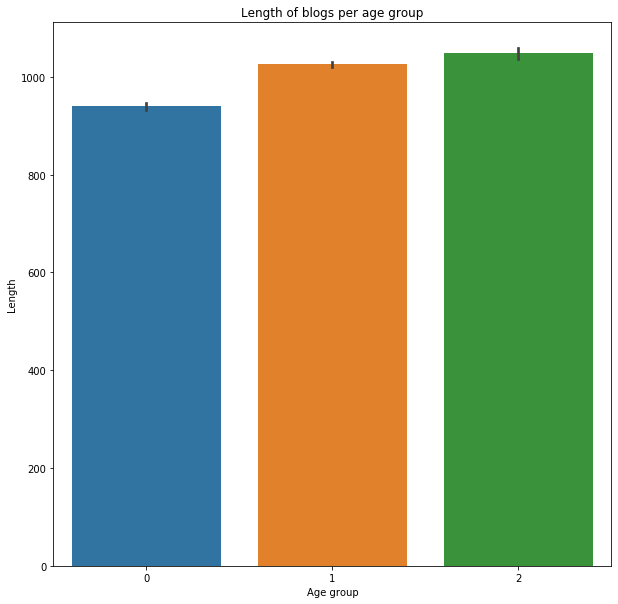

In [6]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(
    y='length',
    x='label',
    data=train_df)
_ = ax.set(title='Length of blogs per age group', xlabel='Age group', ylabel='Length')

## Word Count

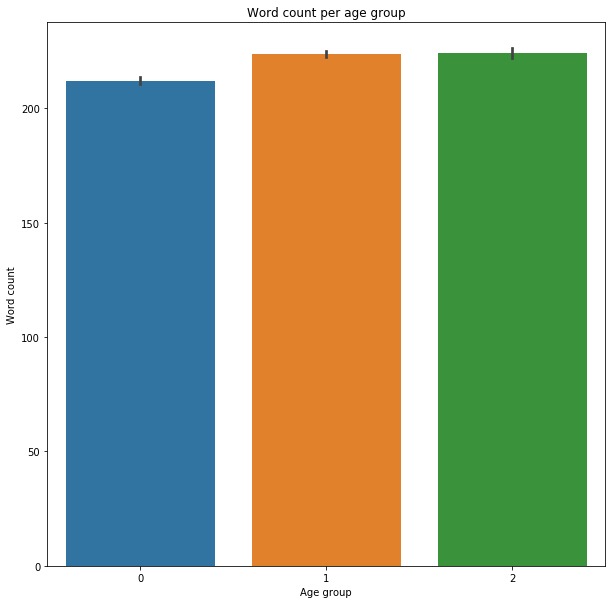

In [7]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(
    y='word_count',
    x='label',
    data=train_df)
_ = ax.set(title='Word count per age group', xlabel='Age group', ylabel='Word count')

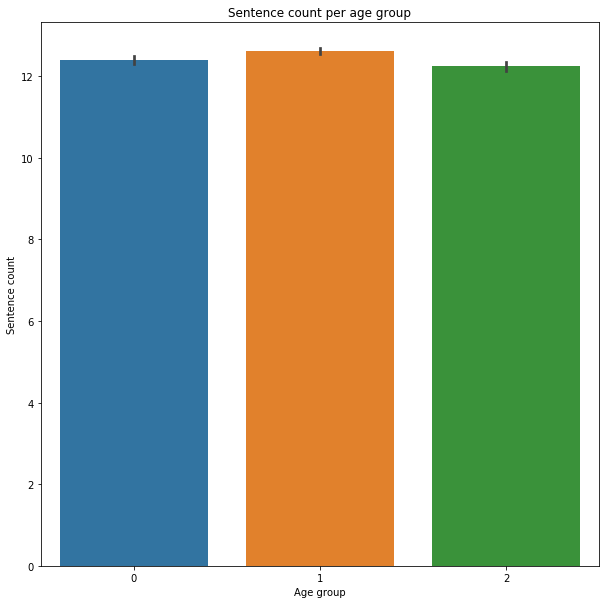

In [8]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(
    y='sentence_count',
    x='label',
    data=train_df)
_ = ax.set(title='Sentence count per age group', xlabel='Age group', ylabel='Sentence count')

### Qualitative Observations
* The length of comments might be a useful feature in classifying (i.e. there is some variation across groups)
* The different measures of length (character count, word count, sentence count) produce slighly different results

## Swear Word Analysis
Determine the difference in the use of swear words by category.

The following list of swear words was used:
https://www.kaggle.com/highflyingbird/swear-words

In [12]:
def read_word_list(file_name):
    with open(file_name) as word_list_file:
        return set(word.strip() for word in word_list_file)

In [13]:
def enhance_bad_words(df):
    bad_words = read_word_list(BAD_WORD_LIST)
    df['bad_word_count'] = df.words.apply(lambda words: len(set(word.lower() for word in words) & bad_words))
    df['has_bad_words'] = df.bad_word_count > 0
    
enhance_bad_words(train_df)

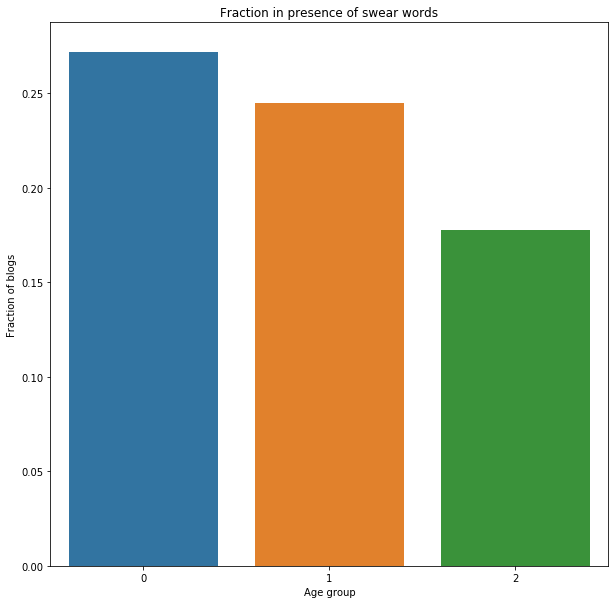

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(y='has_bad_words', x='label', data=train_df, errwidth=0)
_ = ax.set(title='Fraction in presence of swear words', xlabel='Age group', ylabel='Fraction of blogs')

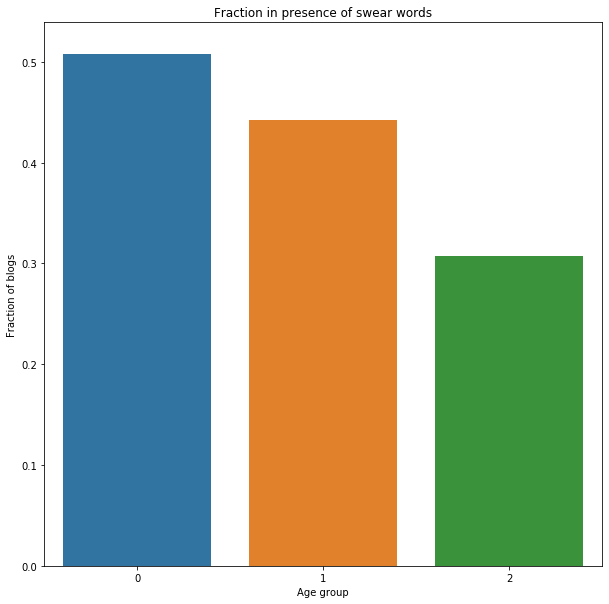

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(y='bad_word_count', x='label', data=train_df, errwidth=0)
_ = ax.set(title='Fraction in presence of swear words', xlabel='Age group', ylabel='Fraction of blogs')

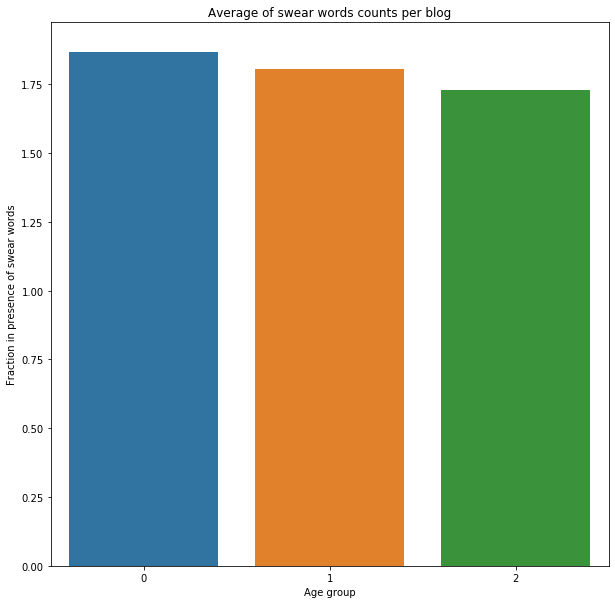

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(y='bad_word_count', x='label', data=train_df[train_df.has_bad_words], errwidth=0)
_ = ax.set(title='Average of swear words counts per blog', xlabel='Age group', ylabel='Fraction in presence of swear words')

### Qualitative Observations
* Some categories has higher fraction of swear words than others

## Reading Ease Statistics

Enhance the data set with the following metrics:
* Flesch Reading Ease (measures ease of reading)
* Smog Index (measures the use of complex words)
* Flesch-Kincaid Grade Level (an estimate of the grade level at which the text is written)
* Difficult Words: the number of difficult words

In [17]:
readability_stats = [
    ('flesch_reading_ease', 'Flesch Reading Ease'),
    ('flesch_kincaid_grade', 'Flesch-Kincaid Grade Level'), 
    ('difficult_words', 'Difficult Words')]
def enhance_readability(df):
    for item in readability_stats:
        key, label = item
        tqdm.pandas(desc=label)
        stat = getattr(textstat, key)
        df[key] = df.comment.progress_apply(stat)
        
enhance_readability(train_df)

In [18]:
keys = [key for key, _ in readability_stats]
train_df.groupby('label')[keys].describe()

flesch_reading_ease                                                   \
                    count        mean         std       min     25%    50%   
label                                                                        
0                180159.0  -84.748807  304.121554 -56471.13 -133.56 -12.77   
1                240715.0 -101.158651  278.943771 -31688.39 -158.93 -18.86   
2                 91755.0 -104.339683  288.649555 -17039.06 -153.86 -11.42   

                     flesch_kincaid_grade             ...                 \
         75%     max                count       mean  ...   75%      max   
label                                                 ...                  
0      50.17  206.84             180159.0  68.652489  ...  88.3  21735.2   
1      48.48  121.22             240715.0  74.307692  ...  97.3   7633.2   
2      48.14  121.22              91755.0  75.048589  ...  94.9   6586.1   

      difficult_words                                                      
                count       mean        std  min  25%   50%   75%     max  
label                                                                      
0            180159.0  17.275290  24.073809  0.0  4.0  10.0  22.0  1820.0  
1            240715.0  22.132169  30.352227  0.0  4.0  13.0  29.0  1815.0  
2             91755.0  24.276050  35.959404  0.0  4.0  13.0  31.0  1393.0  

[3 rows x 24 columns]

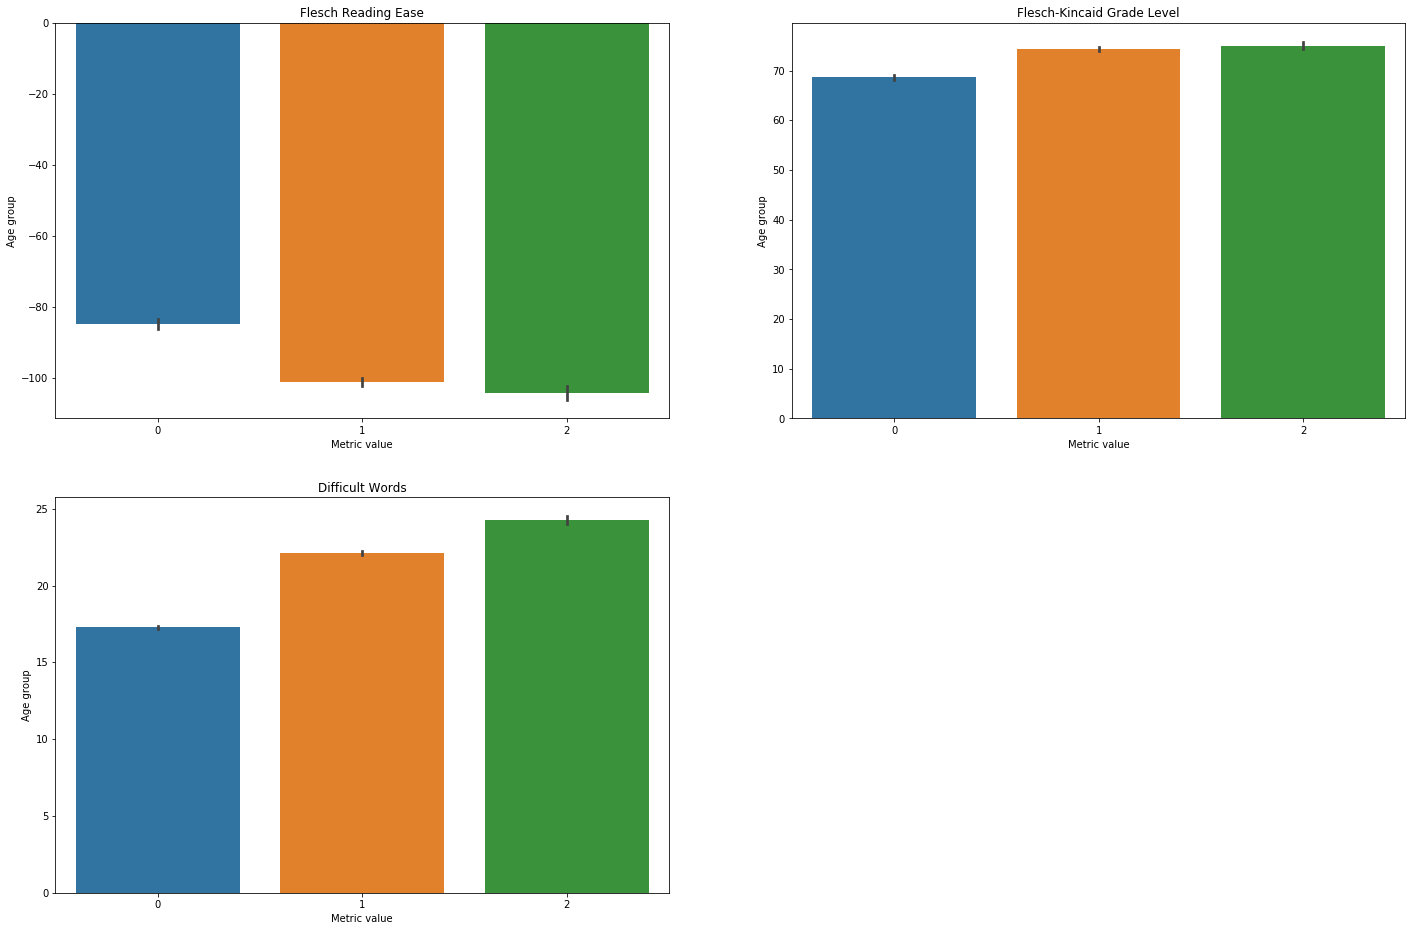

In [19]:
plt.figure(figsize=(10, 16))
plt.subplots_adjust(right=2)
for idx, item in enumerate(readability_stats):
    key, label = item
    plt.subplot(2, 2, idx + 1)
    ax = sns.barplot(y=key, x='label', data=train_df)
    _ = ax.set(title=label, xlabel='Metric value', ylabel='Age group')


### Qualitative Observations:
* Flesch Reading Ease (Class 1 seems to be the hardest to read : lowest value)
* There is significant variation from one class to another in most of the metrics.
* Introducing the Flesch-Kincaid Grade Level, the Smog Index and the Difficult Words would be redundant because they appear to be producing similar results. 